# Customer Segmentation


<h3>
    <li>Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.</li><br>
    <li>In consumer marketing, businesses often segment their customer base by demographic attributes, such as age, gender, geographic location (urban, suburban, or rural), marital status (single, married, divorced, etc.), and income levels.
</li><br>
 <li>Segmentation helps marketers target different groups more effectively with customized advertising plans and strategy.</li>
</h3>

## Importing Libraries


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
from IPython.core.display import HTML,display
import scipy.stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

/var/folders/rq/rtxryn3j4c91cgyhb885lxn40000gn/T/ipykernel_89472/990569478.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display


## Importing Data


In [44]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA


In [45]:
# checking the number of rows and columns
rows,columns=df.shape[0],df.shape[1]
display(HTML(f"<h3>  <b style='color:#00FFFF;font-size:23px;'>Findings </b>:<ul><li>There are {rows} rows and {columns} columns in the dataset.</li></ul></h3>"))

In [46]:
#checking the data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
# renaming some columns for ease of working
df.rename(columns={'Annual Income (k$)':"Annual_Income",'Spending Score (1-100)':'Score'},inplace=True)

In [48]:
# checking for NaN instances
no_of_nan_values=df.isna().sum().sum()
display(HTML(f"<h3>  <b style='color:#00FFFF;font-size:22px;'>Findings </b>:<ul><li>There are {no_of_nan_values} NaN values.</li></ul></h3>"))

In [49]:
# checking for duplicate instances
no_of_duplicates=df.duplicated().sum()
display(HTML(f"<h3>  <b style='color:#00FFFF;font-size:22px;'>Findings </b>:<ul><li>There are {no_of_duplicates} duplicate values.</li></ul></h3>"))


In [50]:
# Checking the discriptive statistics about the data
df.describe()

,CustomerID,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Univariate Analysis


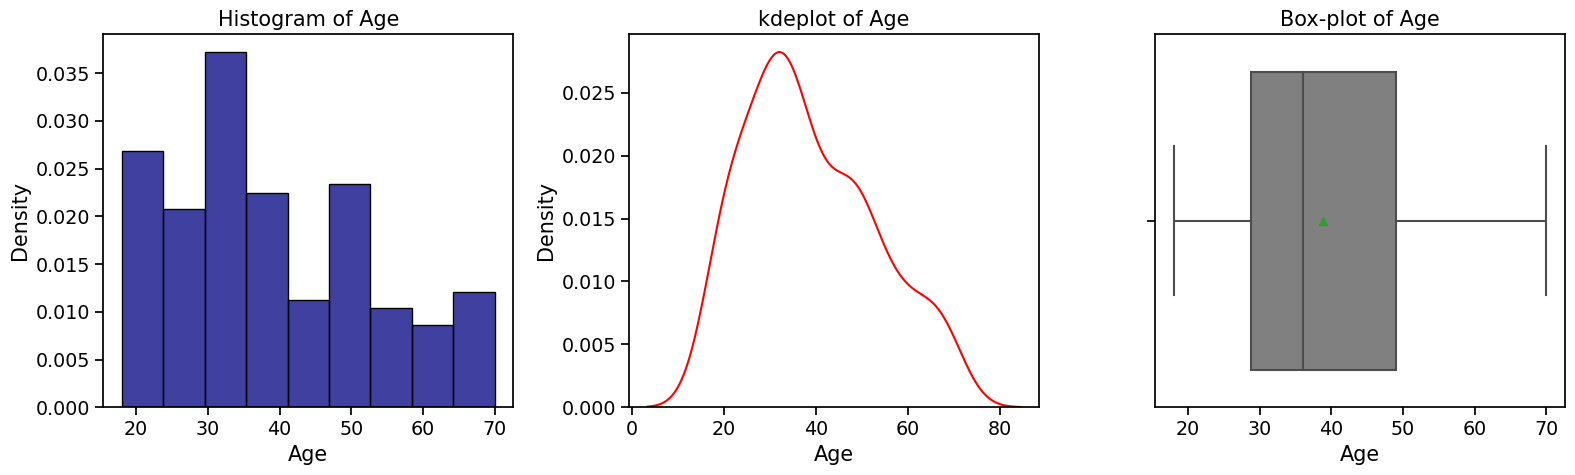

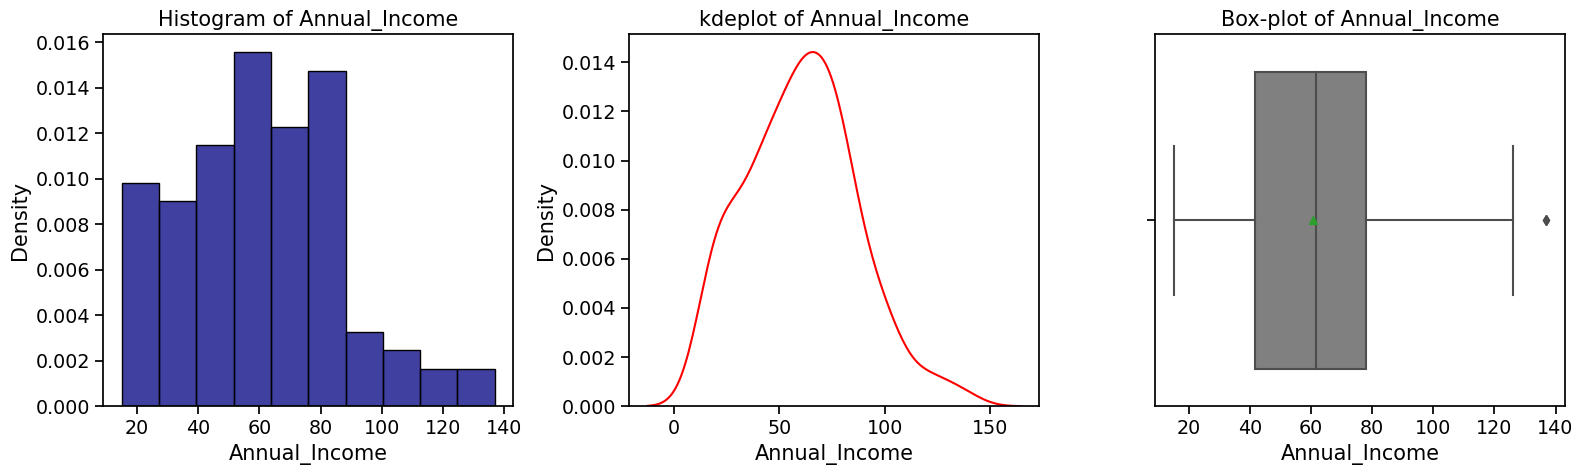

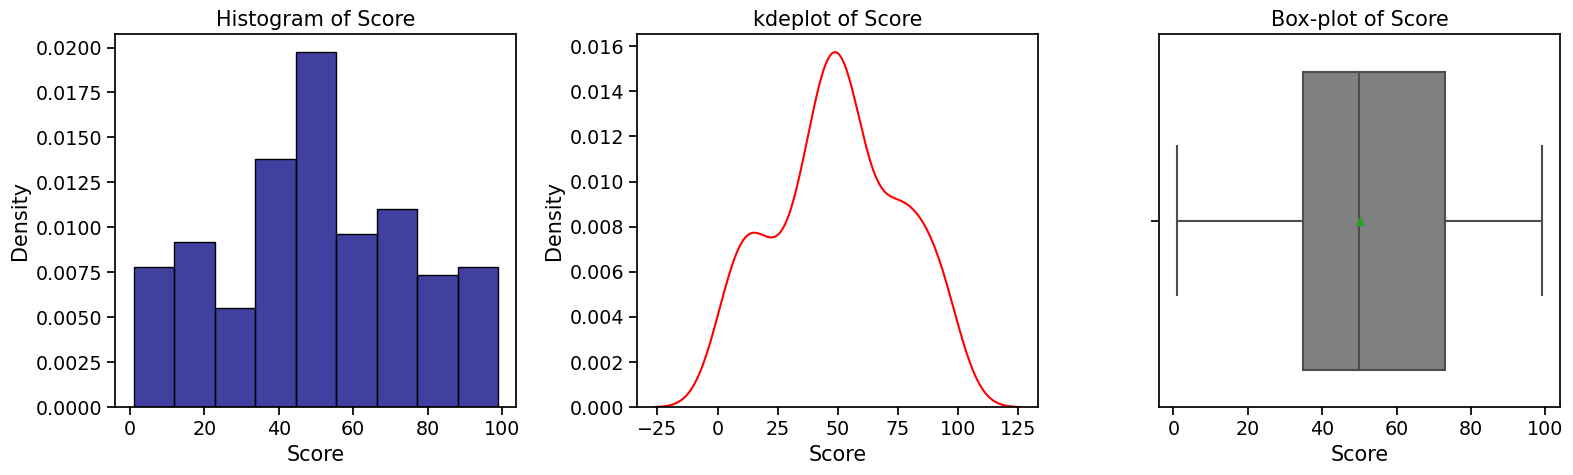

In [51]:
imp_numerical_cols=['Age','Annual_Income','Score']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:white'>" + f"Distribution of</b> <b style='color:white'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data=df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df,x=col,color='grey',showmeans=True)
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>The kde plot is generated by using our data as sample of a bigger population therefore it gives a more generalized shape to it.</li><br>
    <li>The whiskers of the box plot are values corresponding to Q1-1.5*IQR and Q3+1.5*IQR,where IQR stands for Inter Quartile Range (Q3-Q1) and values lying outside of the whiskers are treated as outliers.</li><br>
        <li> In box plot the central line stands for Median and the green arrow for Mean.</li><br>
        <li> Age and Annual_Income is slightly right skewed. Spending score is normally distributed.</li>
    </ul>
</h3>


## Bivariate Analysis



### Checking for Association between Gender and Score

* <b> Stating the hypothesis:</b>

>  **H0:Gender and Score are independent.**

>  **H1:Score depends on Gender.**


In [52]:
cont_table= pd.crosstab(df['Gender'],df['Score'])
_,p_value,_,_=scipy.stats.chi2_contingency(cont_table,correction=True)
print(f"The p-value for the test:{p_value:.4f}")

The p-value for the test:0.3412


<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis------->Spending Score is independent of Gender.</li>
    </ul>
</h3>

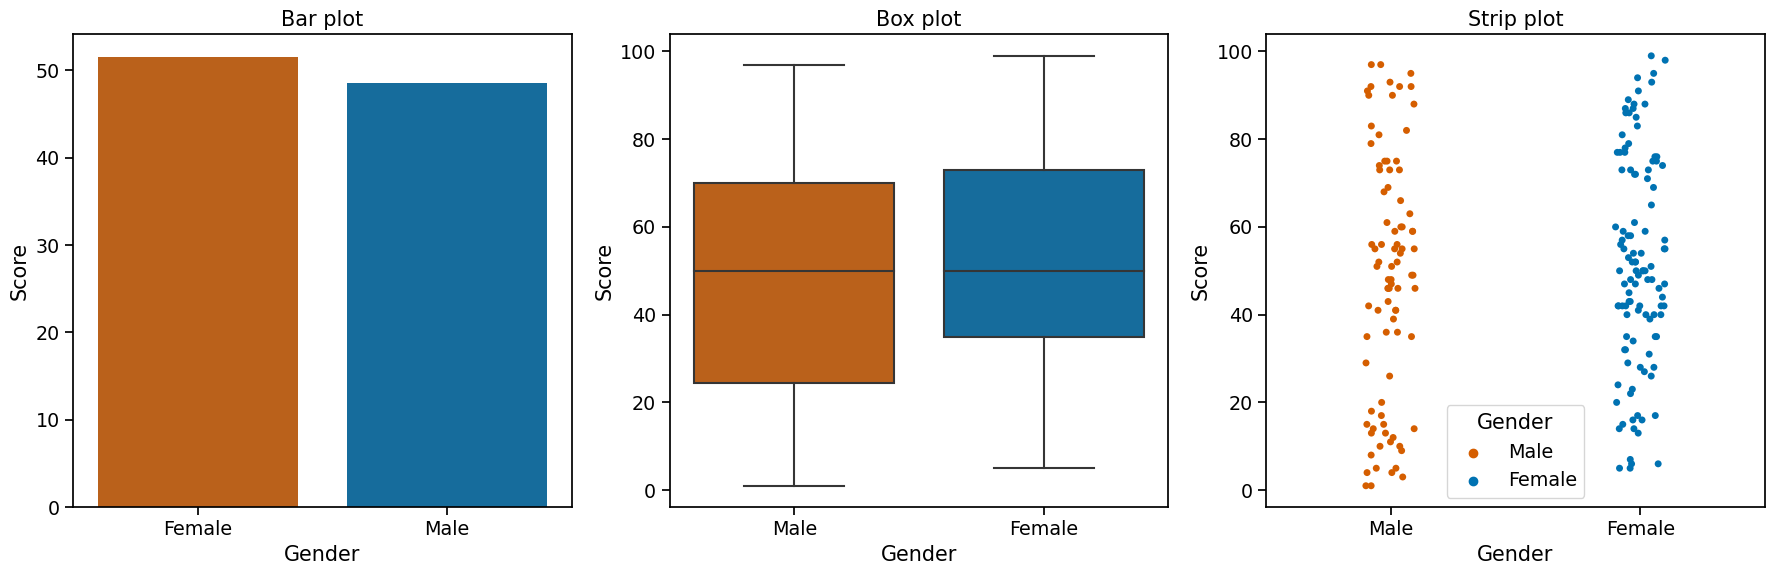

In [53]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:white'>" + f"Association between </b> <b style='color:white'> Gender and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,3,1)
temp=df.groupby('Gender')['Score'].mean().reset_index()
sns.barplot(data=temp,x='Gender',y='Score',palette=['#D55E00','#0072B2']);
plt.title("Bar plot",fontsize=15)
ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='Gender',y='Score',palette=['#D55E00','#0072B2']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df, x='Gender', y='Score', hue='Gender', palette=['#D55E00', '#0072B2'])
plt.title("Strip plot",fontsize=15)

plt.tight_layout()

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>The above visuals strengthen our claim that Gender has no impact on Spending Score.</li>
    </ul>
</h3>

### Checking for Association between Gender and Annual Income

* <b> Stating the hypothesis:</b>

>  **H0:Gender and Annual Income  are independent.**

>  **H1:Annual Income depends on Gender.**

In [54]:
cont_table= pd.crosstab(df['Gender'],df['Annual_Income'])
_,p_value,_,_=scipy.stats.chi2_contingency(cont_table,correction=True)
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:0.3495


<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>Since the p-value > 0.05 we fail to reject the H0 hypothesis------->Annual Income is independent of Gender.</li>
    </ul>
</h3>

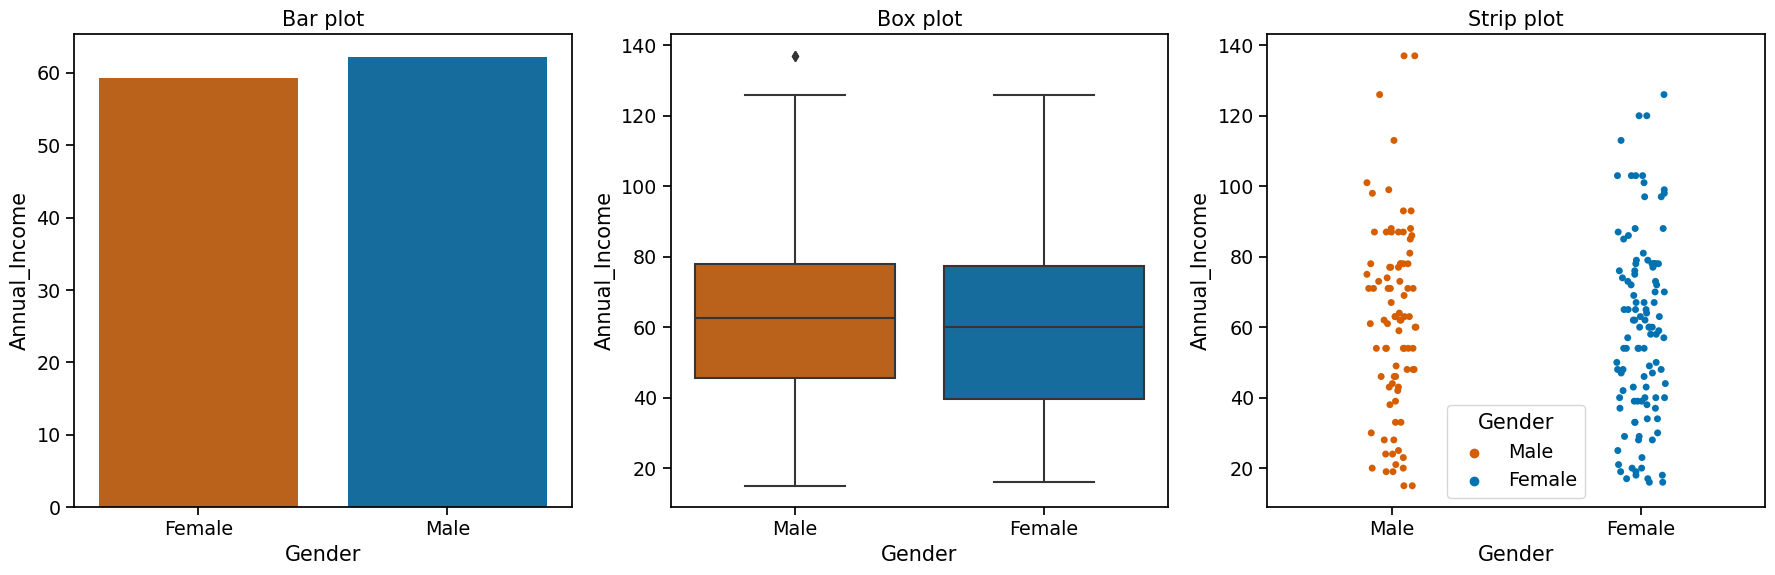

In [55]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:white'>" + f"Association between </b> <b style='color:white'> Gender and Annual_Income"+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,3,1)
temp=df.groupby('Gender')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp,x='Gender',y='Annual_Income',palette=['#D55E00','#0072B2']);
plt.title("Bar plot",fontsize=15)
ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='Gender',y='Annual_Income',palette=['#D55E00','#0072B2']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='Gender',y='Annual_Income',hue = "Gender",palette=['#D55E00','#0072B2']);
plt.title("Strip plot",fontsize=15)
plt.tight_layout()

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>The above visuals strengthen our claim that Gender has no impact on Annual Income.</li>
    </ul>
</h3>

### Checking for Association between Annual Income and Score

* <b>Stating the hypothesis:</b>

> <b> H0:The Annual Income and Score are not correlated.</b>

> <b>H1:The Annual Income and Score are correlated.</b>

In [56]:
p_value,_=scipy.stats.pearsonr(df['Annual_Income'],df['Score'])
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:0.0099


<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>Since the p-value < 0.05 we reject the H0 hypothesis->Annual Income and Spending Score are correlated. </li>
    </ul>
</h3>

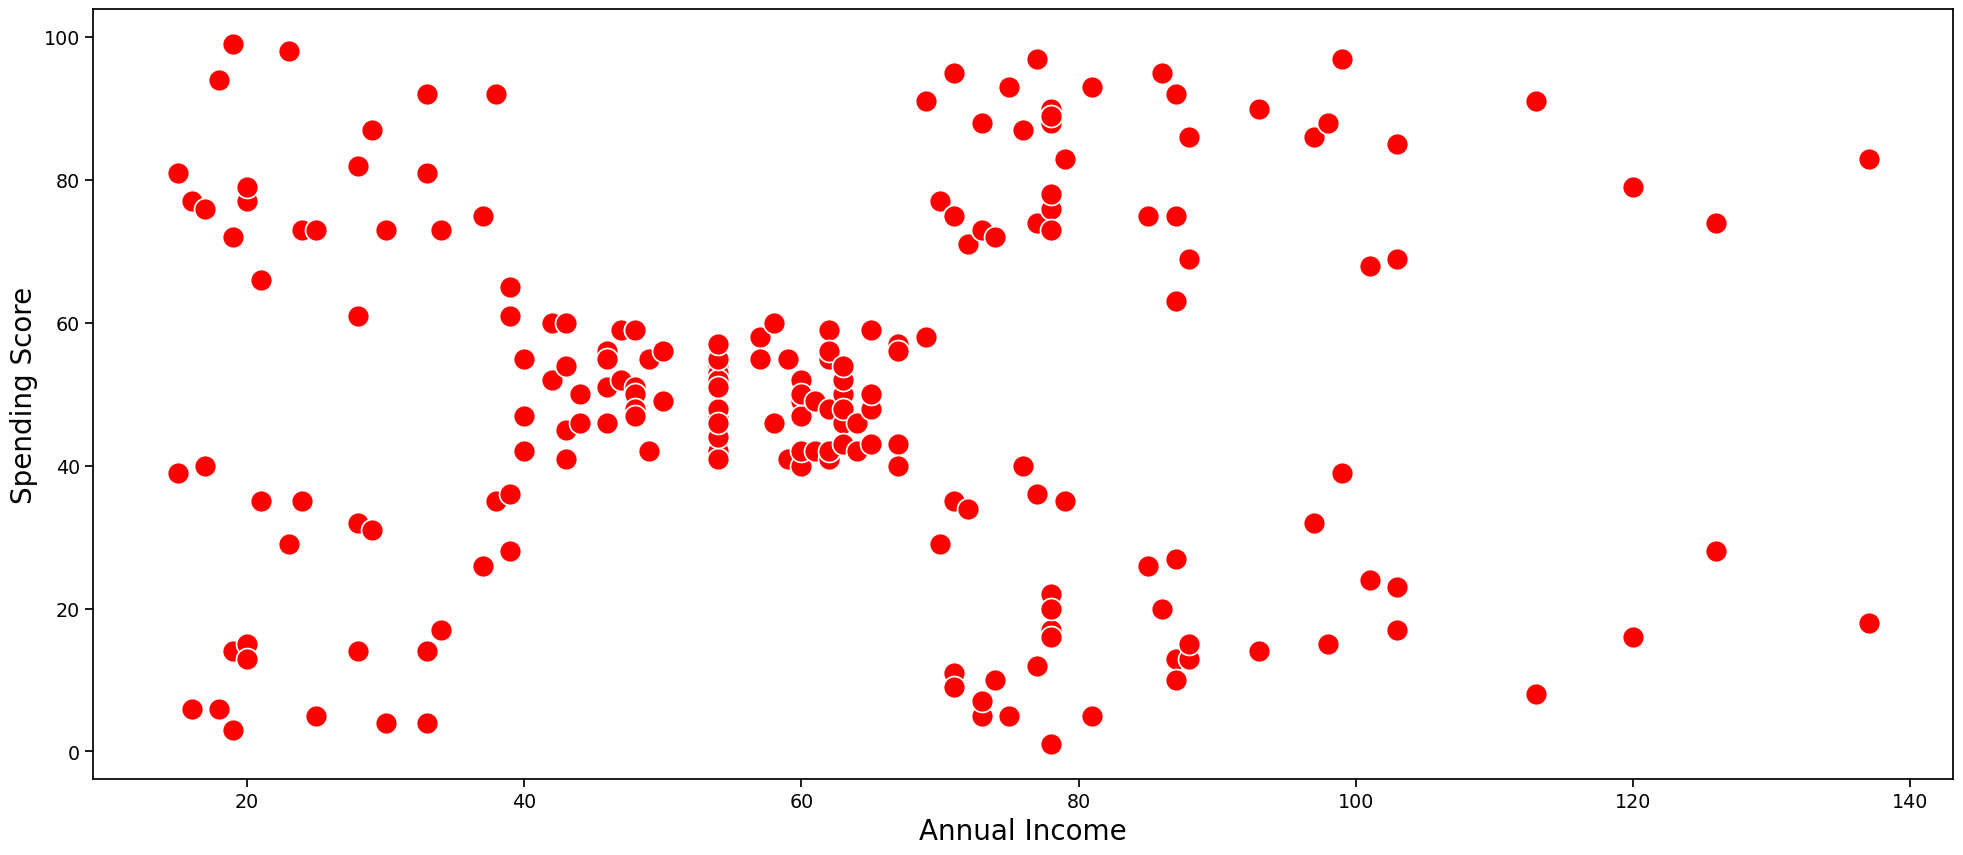

In [57]:
plt.figure(figsize=(24,10))
text="<center><h3><b  style='color:white'>" + f"Association between </b> <b style='color:white'> Annual_Income and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Annual_Income',y='Score',s=250,color='red');
plt.xlabel("Annual Income",fontsize=20)
plt.ylabel("Spending Score",fontsize=20);

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>The above visual gives me the impression that there is small posive correlation between Annual Income and Spending Score. However, it's very hard to tell. </li>
    </ul>
</h3>

In [58]:
# binning the Age feature
bins=[0,20,40,60,80]
labels=np.arange(0,len(bins)-1)
df['binned_Age']=pd.cut(df['Age'],bins,labels=labels)

In [67]:
# Define bins and labels
bins = [0, 21, 41, 61, 81]
labels = np.arange(0, len(bins) - 1)

# Create a mapping of bin labels to age ranges
bin_label_to_age_range = {str(label): f"{bins[i]}-{bins[i+1]-1}" for i, label in enumerate(labels)}

for bin, age_range in bin_label_to_age_range.items():
    print(f"Bin {bin} is age range {age_range}")

Bin 0 is age range 0-20
Bin 1 is age range 21-40
Bin 2 is age range 41-60
Bin 3 is age range 61-80


### Checking the Association between Age(Binned) and Spending Score

* **Stating the hypothesis:**

> **H0: The mean score of all Age groups is equal.**

> **H1: At least one to mean Annual Income of Age groups differ.**

In [68]:
# test for equality of variance
#h0:the variances are equal
# h1:the variances are not equal

_,p_value=scipy.stats.levene(df[df['binned_Age']==0]['Score'],
                   df[df['binned_Age']==1]['Score'],
                   df[df['binned_Age']==2]['Score'],
                   df[df['binned_Age']==3]['Score'],center='mean')
print(f"p-value for the test:{p_value:.4f}")
# Since the p_value < 0.05 the variances are not equal.

p-value for the test:0.0004


In [69]:
f_statistic, p_value = scipy.stats.f_oneway(df[df['binned_Age']==0]['Score'], df[df['binned_Age']==1]['Score'], df[df['binned_Age']==2]['Score'],df[df['binned_Age']==3]['Score'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.40059070488781, P-Value: 1.510354860990316e-11


<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li> Since the p_value < 0.05 we reject the null hypothesis ---->atleast one of the mean of Age Groups Spending Score differs.</li>
    </ul>
</h3>

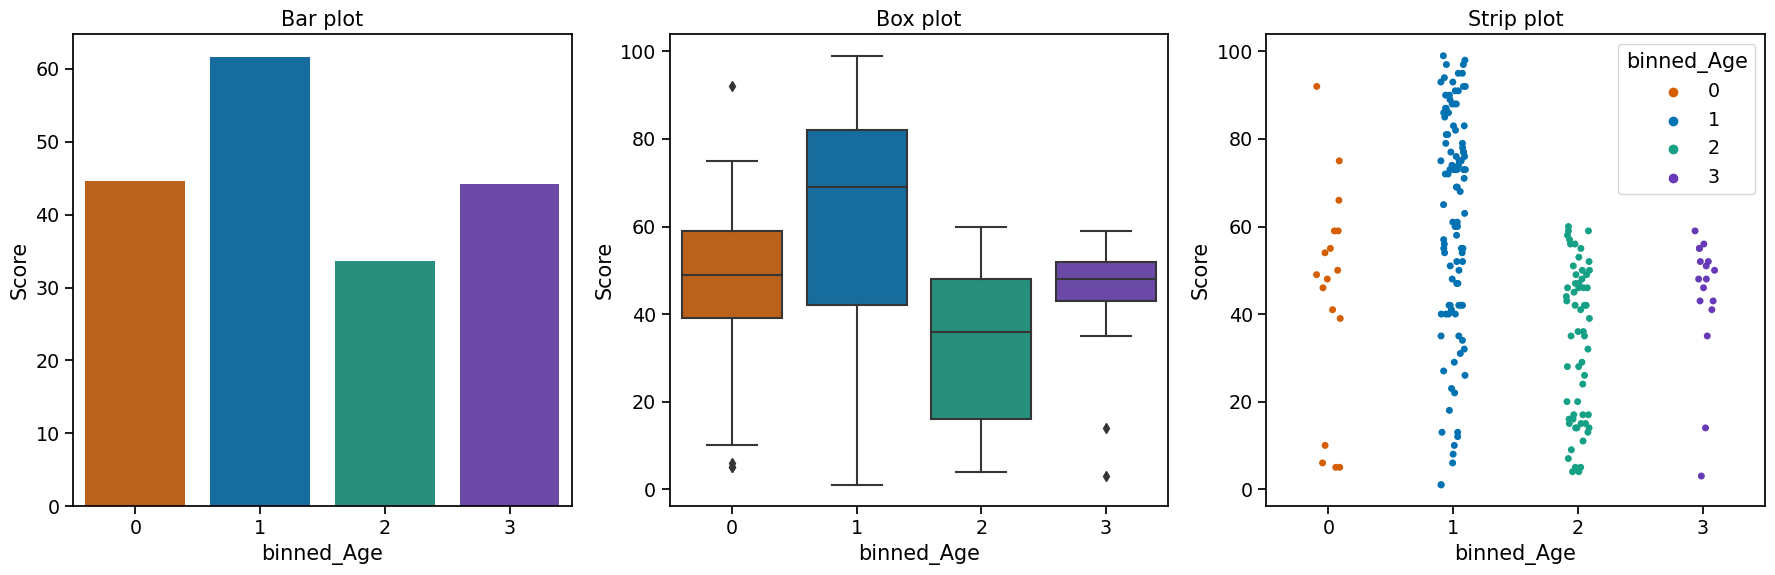

In [70]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:white'>" + f"Association between </b> <b style='color:white'> Age(Binned) and Spending Score"+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,3,1)
temp=df.groupby('binned_Age')['Score'].mean().reset_index()
sns.barplot(data=temp,x='binned_Age',y='Score',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Bar plot",fontsize=15)
ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='binned_Age',y='Score',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='binned_Age',y='Score',hue='binned_Age',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)
plt.tight_layout()

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings
 </b>:
    <ul>
    <li>The above visuals strengthens our claim that Age groups mean Spending Score differs.</li>
    </ul>
</h3>

### Checking the Association between Age(Binned) and Annual Income

* **Stating the hypothesis:**

> **H0: The mean Annual Income of all Age groups is equal.**

> **H1: At least one to mean Annual Income of Age groups differ.**

In [71]:
# test for equality of variance
# h0:the variances are equal
# h1:the variances are not equal

_,p_value=scipy.stats.levene(df[df['binned_Age']==0]['Annual_Income'],
                   df[df['binned_Age']==1]['Annual_Income'],
                   df[df['binned_Age']==2]['Annual_Income'],
                   df[df['binned_Age']==3]['Annual_Income'],center='mean')
print(f"p-value for the test:{p_value:.4f}")
# Since the p_value < 0.05 the variances are not equal.

p-value for the test:0.0029


In [72]:
f_statistic, p_value = scipy.stats.f_oneway(df[df['binned_Age']==0]['Score'], df[df['binned_Age']==1]['Score'], df[df['binned_Age']==2]['Score'],df[df['binned_Age']==3]['Score'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.40059070488781, P-Value: 1.510354860990316e-11


<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li> Since the p_value < 0.05 we reject the null hypothesis ---->atleast one of the mean of Age Groups Annual Income differs.</li>
    </ul>
</h3>

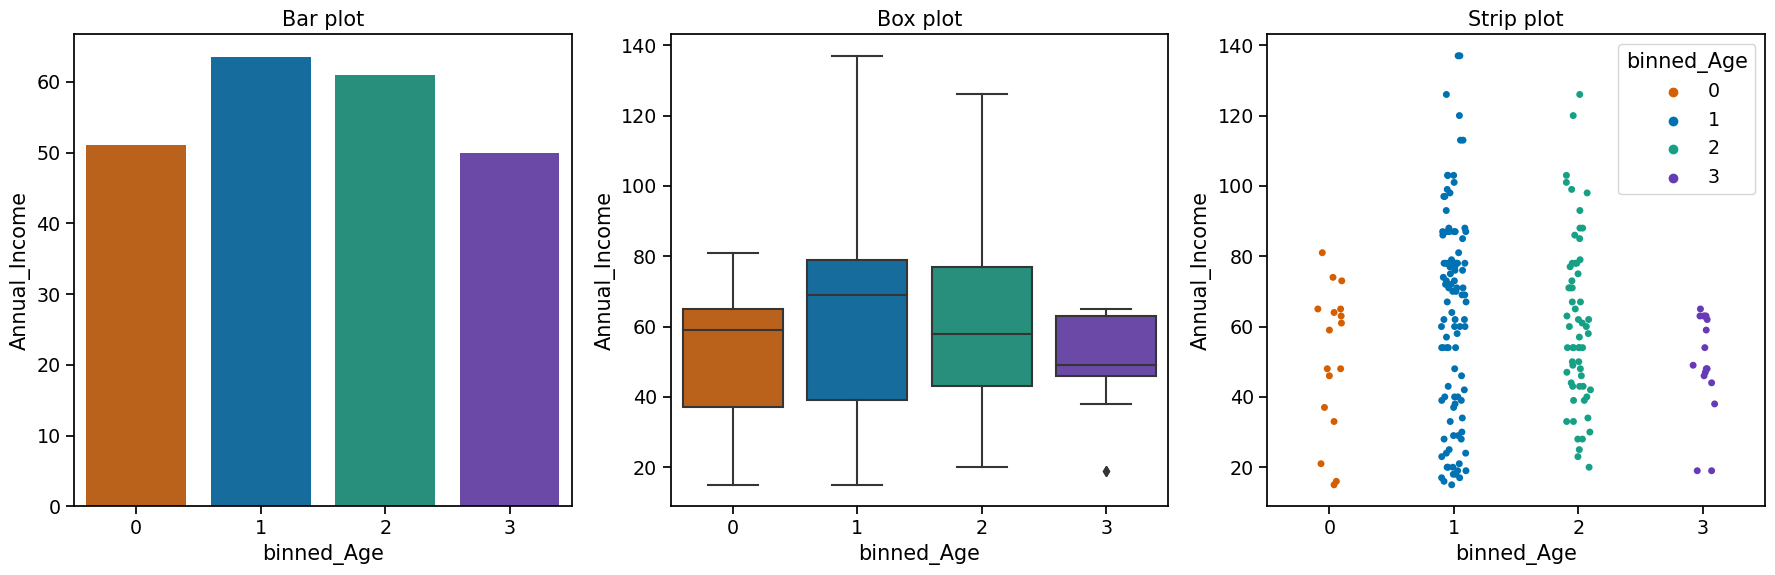

In [74]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:white'>" + f"Association between </b> <b style='color:white'> Age(Binned) and Annual Income"+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,3,1)
temp=df.groupby('binned_Age')['Annual_Income'].mean().reset_index()
sns.barplot(data=temp,x='binned_Age',y='Annual_Income',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Bar plot",fontsize=15)
ax=plt.subplot(1,3,2)
sns.boxplot(data=df,x='binned_Age',y='Annual_Income',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Box plot",fontsize=15)

ax=plt.subplot(1,3,3)
sns.stripplot(data=df,x='binned_Age',y='Annual_Income',hue='binned_Age',palette=['#D55E00','#0072B2','#16A085','#673AB7']);
plt.title("Strip plot",fontsize=15)
plt.tight_layout()

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>The above visuals strengthens our claim that Age groups mean Annual Income differs.</li>
    </ul>
</h3>

## Modelling-KMeans


<h3> <b style='color:#00FFFF;font-size:22px;'>Note </b>:
    <ul>
    <li>We can consider any number of features as an input to the Clustering Algorithm but to visualize the results at most I can consider only three features.</li><br>
    <li>Gender is the least important feature here as per the statistical tests performed so I'm not considering it.
    </ul>
</h3>

In [75]:
# assigning the features to be considered to variable 'X'
X=df[['Annual_Income','Score','binned_Age']].values


### Determining optimum value of K using the Elbow Method
* **k is the parameter of KMeans Algorithm which instructs it how many clusters are needed to be formed of the given data.**

* **init='k-means++' ensures that initial clusters are choosen smartly and not randomly which increases the chances of convergence.**


In [76]:
wcss=[]
for i in range(1,15):
    k_means=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

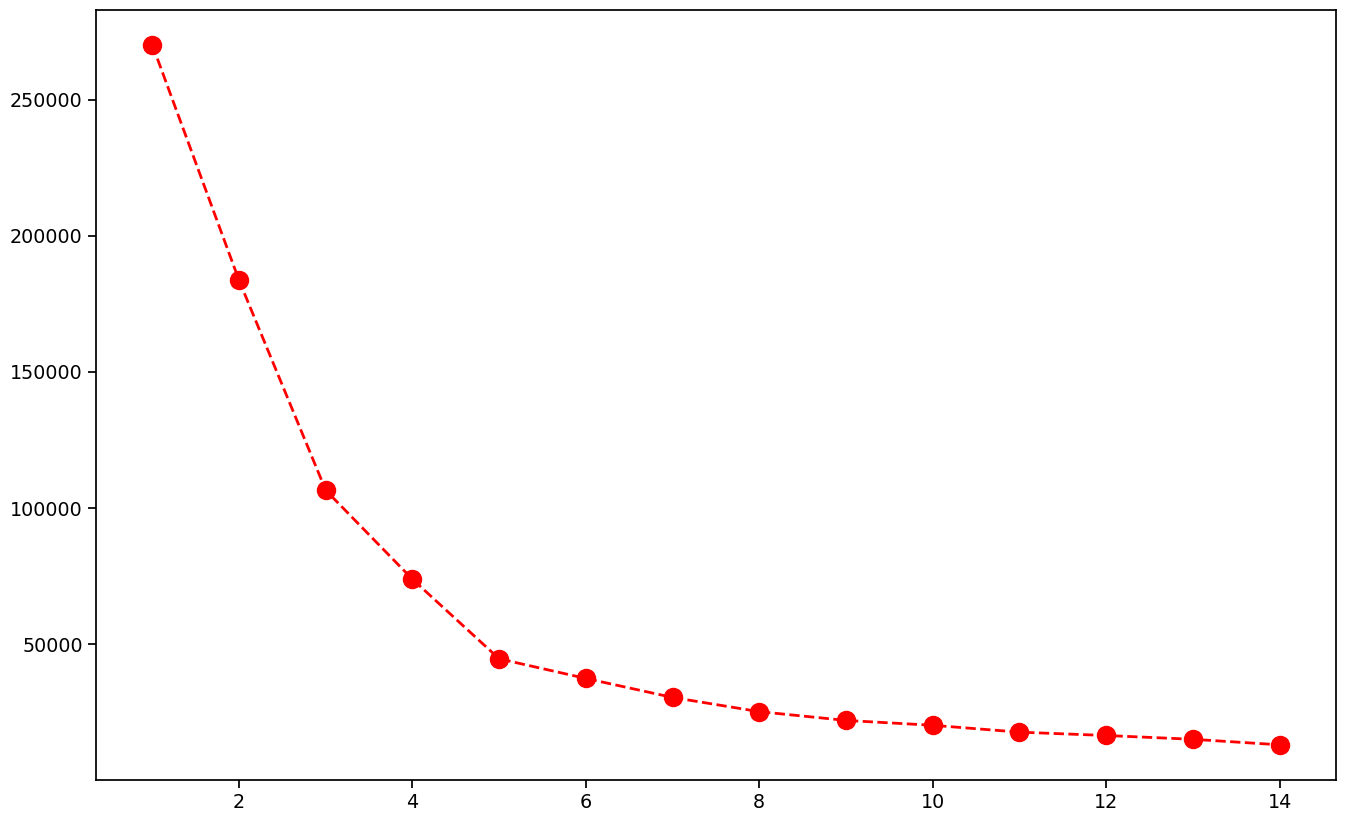

In [77]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(1,15,1),wcss,marker='o',ms=13,c='red',lw=2,mfc='red',mec='r',linestyle='dashed');

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>We observe that after k=5 the inertia or basically mean sum of squared difference of each point in a cluster from its cluster center decreases at a lower rate.</li><br>
     <li> k=5 acts like the elbow and this value gives us a good balance between number of clusters to form and inertia.</li>
    </ul>
</h3>

### K Means with k=5


In [78]:
k_means=KMeans(n_clusters=5,init='k-means++',max_iter=500)
y=k_means.fit_predict(X)

/Users/yupengshen/opt/anaconda3/envs/ALY6020/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualizing the Clusters in 3d


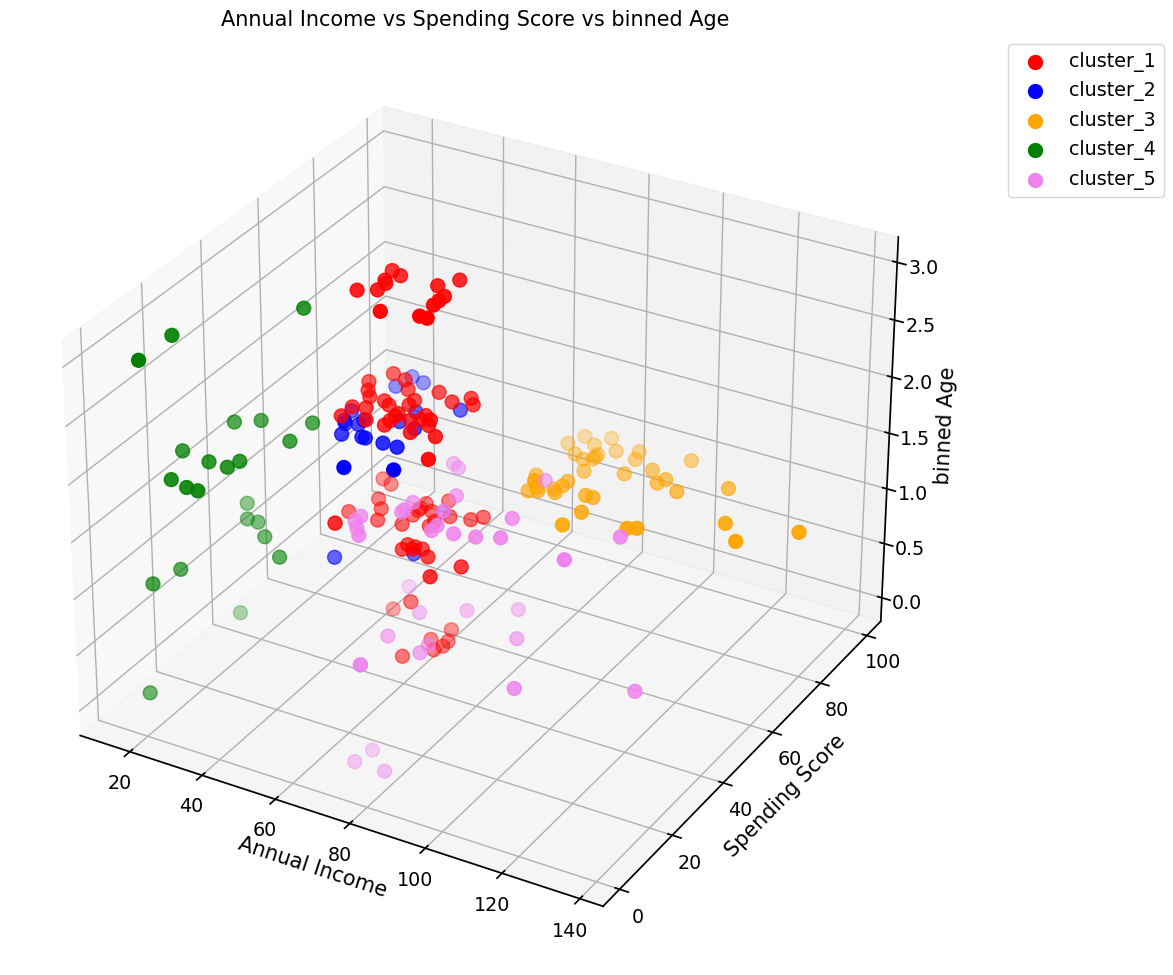

In [79]:
# %matplotlib widget
# sns.set(style = "darkgrid")
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("binned Age")
ax.set_title("Annual Income vs Spending Score vs binned Age")
ax.scatter(X[y==0,0],X[y==0,1],X[y==0,2],s=100,color='red',label='cluster_1')
ax.scatter(X[y==1,0],X[y==1,1],X[y==1,2],s=100,color='blue',label='cluster_2')
ax.scatter(X[y==2,0],X[y==2,1],X[y==2,2],s=100,color='orange',label='cluster_3')
ax.scatter(X[y==3,0],X[y==3,1],X[y==3,2],s=100,color='green',label='cluster_4')
ax.scatter(X[y==4,0],X[y==4,1],X[y==4,2],s=100,color='violet',label='cluster_5')
plt.legend(bbox_to_anchor=(1.25,1.0));
plt.tight_layout()
plt.show()

### Visualizing the Clusters in 2d

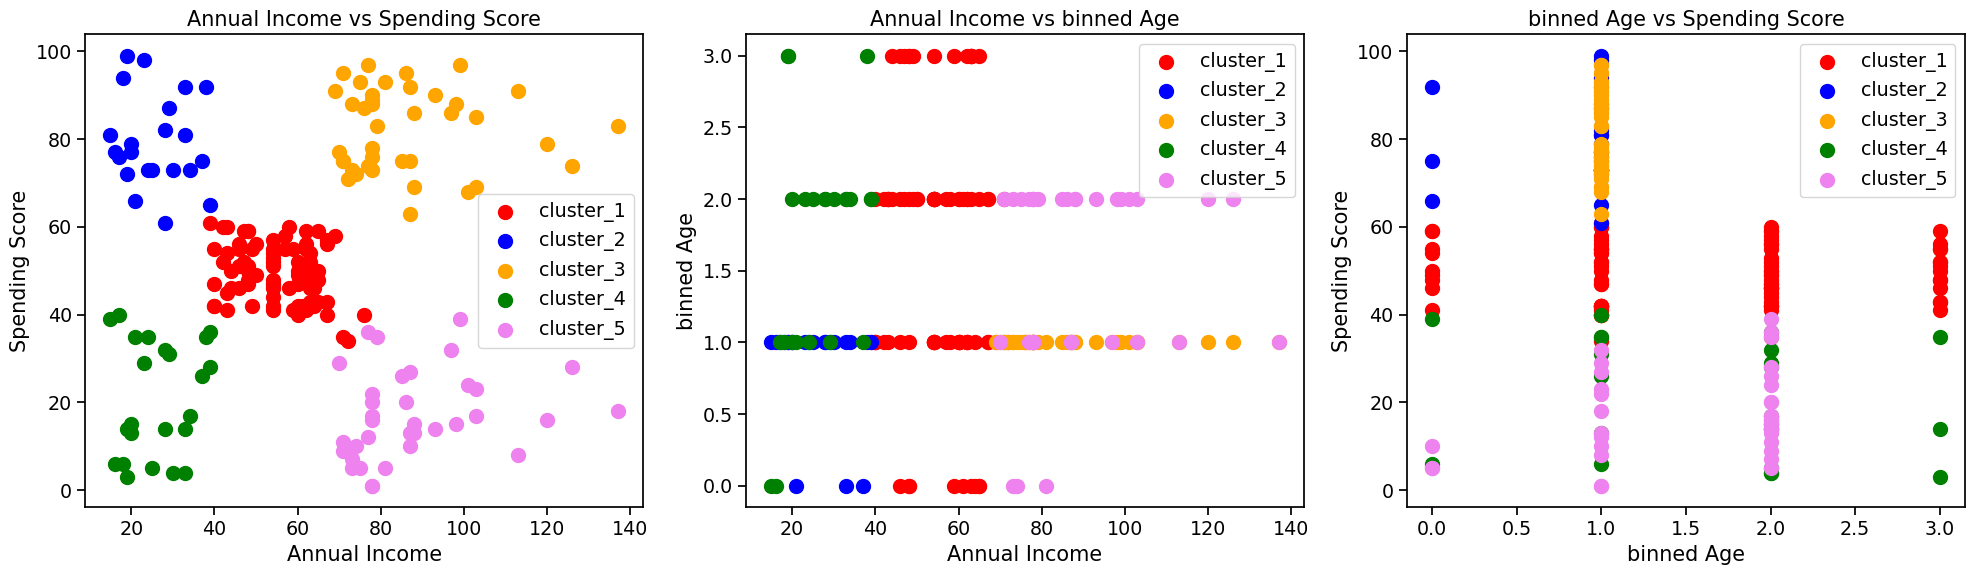

In [80]:
%matplotlib inline
fig = plt.figure(figsize=(20,6))

def plot_2d(x1,y1,xlabel,ylabel,i):
    ax = plt.subplot(1,3,i)
    ax.set_xlabel(f"{xlabel}")
    ax.set_ylabel(f"{ylabel}")
    ax.set_title(f"{xlabel} vs {ylabel}")
    ax.scatter(X[y==0,x1],X[y==0,y1],s=100,color='red',label='cluster_1')
    ax.scatter(X[y==1,x1],X[y==1,y1],s=100,color='blue',label='cluster_2')
    ax.scatter(X[y==2,x1],X[y==2,y1],s=100,color='orange',label='cluster_3')
    ax.scatter(X[y==3,x1],X[y==3,y1],s=100,color='green',label='cluster_4')
    ax.scatter(X[y==4,x1],X[y==4,y1],s=100,color='violet',label='cluster_5')
    ax.legend()
    plt.tight_layout()
#     plt.show()
    
plot_2d(0,1,"Annual Income",'Spending Score',1)
plot_2d(0,2,"Annual Income",'binned Age',2)
plot_2d(2,1,"binned Age",'Spending Score',3)

<h3> <b style='color:#00FFFF;font-size:22px;'>Findings </b>:
    <ul>
    <li>We observe that Annual Income vs Spending plot gives the best representation of the clusters formed.</li><br>
     <li> The blue group includes the customers who although having lower Income tend to spend high percentage of it.</li><br>
        <li> Customers belonging to the green ,red and orange tend to follow a linear relationship between Annual Income and Spend which is what we usually expect.</li><br>
      <li>The violet group represents the customers who although having high Annual Income tend to spend less and this is the group that needs to be especially targeted with special marketing strategy and promotion  so as to entice them to spend more.</li>
    </ul>
</h3>